# Aprendizaje Supervisado

## Regresión Lineal

El término regresión se utilizó por primera vez en el estudio de variables antropométricas: al comparar la estatura de padres e hijos, donde resultó que los hijos cuyos padres tenían una estatura muy superior al valor medio, tendían a igualarse a éste, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la estatura media; es decir, "regresaban" al promedio.

## Definición matemática

## $$y_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

- $y_\beta(x)$ es la respuesta / target
- $\beta_0$ es el intercepto
- $\beta_1$ es el coeficiente para $x_1$ (el primer feature)
- $\beta_n$ es el coeficiente para $x_n$ (el n-ésimo feature)

Los valores de $\beta$ son llamados **los coeficientes del modelo**:

- Estos valores son estimados durante el proceso de ajuste del modelo usando el **criterio de minimos cuadrados**.
- Realmente, buscamos la línea (matemáticamente) que minimize la **suma de cuadrados residual** (o "suma de cuadrados del error").
- Una vez estimado dichos parametros, podemos predecir nuevos resultados.

![Estimating coefficients](https://raw.githubusercontent.com/justmarkham/DAT8/master/notebooks/images/estimating_coefficients.png)

En la imagen superior:

- Los puntos negros son los **valores observados** de x e y.
- La linea azul es nuestra **linea de minimos cuadrados**.
- Las lineas rojas son los **residuales**, que son las distancias veticales entre el valor observado y la linea de minimos cuadrados.

### Regresión lineal simple

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargamos el dataset diabetes
# refecencia: http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf
# diabetes = datasets.load_diabetes() de esta forma sólo se obtiene la data normalizada

# Con esta forma obtenemos la data original según la documentación: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

diabetes = pd.read_table('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt')

In [3]:
diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
Y = diabetes['Y']
X = diabetes.iloc[:,:10]

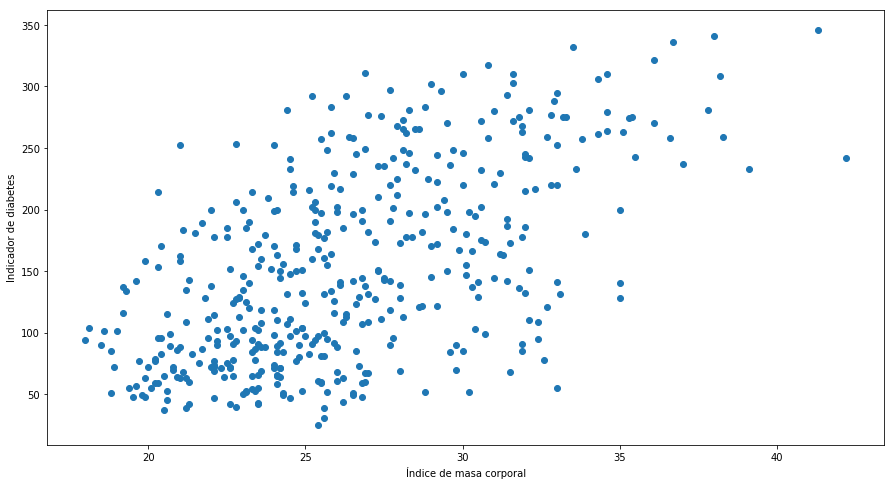

In [6]:
# Usemos varaible BMI (índice de masa corporal) para explicar el indice de diabetes
# Analicemos el efecto de la glucosa con el indicador de diabetes
plt.figure(figsize=(15,8)) #definir el tamaño de la imagen
plt.scatter(X['BMI'], Y)
plt.xlabel('Índice de masa corporal')
plt.ylabel('Indicador de diabetes')

plt.show()

In [7]:
from scipy import stats

In [8]:
X.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'], dtype='object')

In [9]:
import seaborn as sns

In [10]:
# Calculamos la matrix de correlación
corr = diabetes.corr()
corr

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


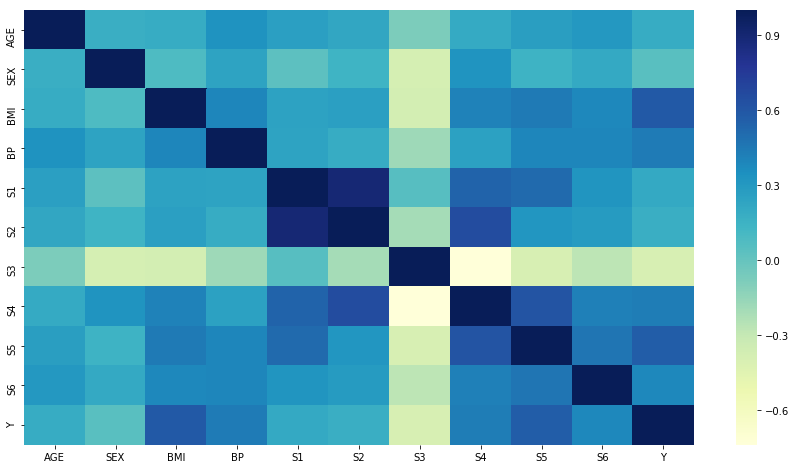

In [11]:
# Mostramos un mapa de calor
plt.figure(figsize=(15,8)) # tamaño del gráfico
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='YlGnBu')

Coeficiente de correlación = 0.5864501344746889 3.466006445167004e-42


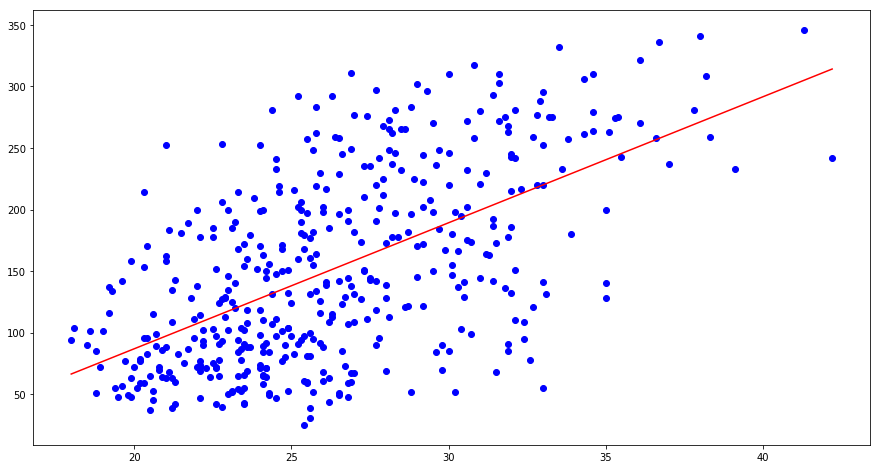

In [16]:
variable = 'BMI'

gradient, intercept, r_value, p_value, std_err = stats.linregress(X[variable],Y)
print('Coeficiente de correlación =',r_value,p_value)

mn=np.min(X[variable])
mx=np.max(X[variable])

x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept

plt.figure(figsize=(15,8)) # tamaño del gráfico
plt.plot(X[variable],Y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

### Regresión lineal múltiple

In [20]:
# Partimos el dataset en Train y Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
# Ajustamos a un modelo de regresión lineal
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions_test = lm.predict(X_test)
predictions_train = lm.predict(X_train)

In [23]:
# Mostrar los coeficientes
print('Intercepto: \n', lm.intercept_)
print('Coeficientes: \n', lm.coef_)
# Error Cuadrático Medio: mide el promedio de los errores al cuadrado
print('Error Cuadrático Medio',mean_squared_error(y_test, predictions_test))
# R cuadrado / coef. de determinación: [0, 1]
print('\nR cuadrado test:',r2_score(y_test, predictions_test))
print('R cuadrado train:',r2_score(y_train, predictions_train))
print('\nMSE test:',mean_squared_error(y_test, predictions_test))
print('MSE train: %.2f'%mean_squared_error(y_train, predictions_train))

Intercepto: 
 -367.92163201791516
Coeficientes: 
 [-1.18991163e-02 -1.97987972e+01  6.37838545e+00  1.19888382e+00
 -1.23056846e+00  8.00808339e-01  7.48548835e-01  8.64865258e+00
  6.85891939e+01  1.97065615e-01]
Error Cuadrático Medio 2341.2232622043202

R cuadrado test: 0.5689706231214972
R cuadrado train: 0.5030486685478779

MSE test: 2341.2232622043202
MSE train: 3008.71


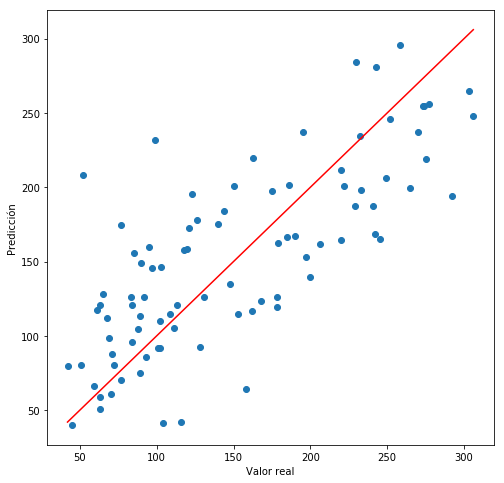

In [24]:
# Grafiquemos el valor real vs la predicción del indicador de diabetes
mn=np.min(y_test)
mx=np.max(y_test)

x1=np.linspace(mn,mx,500)
y1=1*x1+0

plt.figure(figsize=(8,8))

plt.scatter(y_test, predictions_test)
plt.plot(x1,y1,'-r')
plt.xlabel('Valor real')
plt.ylabel('Predicción')

plt.show()

## Regresión Logística

In [26]:
# Cargamos nuestra data de Attrition
df_train_cli = pd.read_excel('D:/EFS/Modulo4/Sesion4/data/train_clientes.xlsx')

In [27]:
df_train_cli.index = df_train_cli['ID_CORRELATIVO']
df_train_cli.drop(columns=['CODMES','ID_CORRELATIVO'], inplace=True)
df_train_cli.dropna(subset=['ANTIGUEDAD'], inplace = True) # eliminamos los nulos de ANTIGUEDAD

Text(0,0.5,'ATTRITION')

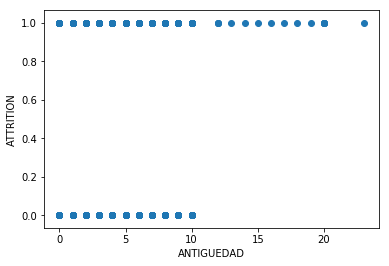

In [28]:
plt.scatter(df_train_cli.ANTIGUEDAD, df_train_cli.ATTRITION)
plt.xlabel('ANTIGUEDAD')
plt.ylabel('ATTRITION')

Notamos que:
    - Si ANTIGUEDAD <=10, entonces la clase predicha de ATTRITION será 0
    - Si ANTIGUEDAD >10, entonces la clase predicha de ATTRITION será 1
    
En el mejor de los casos sería...
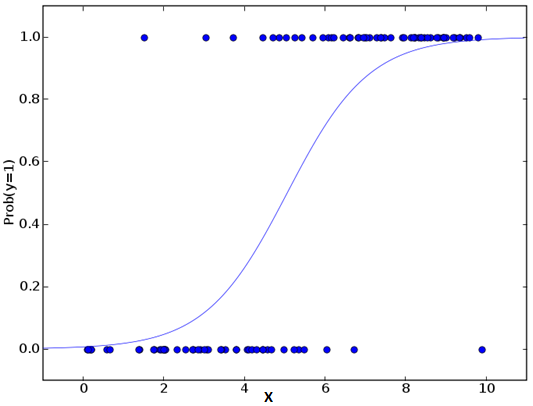

In [29]:
df_train_cli['ATTRITION_pred'] = np.where(df_train_cli.ANTIGUEDAD.fillna(0) > 10, 1, 0)
df_train_cli.head()

,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,...,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,ATTRITION_pred
ID_CORRELATIVO,,,,,,,,,,,,,,,,,,,,,
35653,1,Rang_ingreso_06,Lima,25.0,6.0,0,Rango_SDO_09,0,0,0,...,1,1,1,1,0,0,0,0,0,0
66575,1,Rang_ingreso_03,Provincia,27.0,0.0,0,Rango_SDO_01,0,0,0,...,1,1,1,0,0,0,0,0,0,0
56800,1,Rang_ingreso_01,Provincia,34.0,4.0,0,Rango_SDO_02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8410,1,Rang_ingreso_04,Provincia,63.0,5.0,0,Rango_SDO_03,0,0,0,...,3,3,3,1,1,1,1,1,1,0
6853,1,NaN,Lima,25.0,0.0,0,Rango_SDO_01,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ¿Qué es una Regresión Logística?

**Regresión lineal:** varible objetivo continua es modelada como una combinación lineal de las variables predictoras:

$$y = \beta_0 + \beta_1x$$

**Regresión logística:** log-odds de una respuesta categorica "true" (1) es modelada como una combinación lineal de las variables predictoras:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

Esta es la llamada **función logit**.

Algunas veces es escrita como pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

La ecuación puede ser redefinida como la **función logistic**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

... también conocida como la función sigmoid
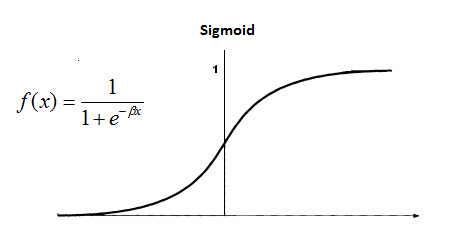

In [30]:
import statsmodels.api as sm

In [31]:
del df_train_cli_aux
del df_train_cli_bal

NameError: name 'df_train_cli_aux' is not defined

In [32]:
# Eliminamos variables generadas anteriormente
df_train = df_train_cli.drop(columns=['ATTRITION_pred'])   

# Creamos variables dummy
cols_cat = list(df_train.select_dtypes(include=['object']).columns)
df_cat = pd.get_dummies(df_train[cols_cat])

# Agregamos las variables dummy
df_train = df_train.merge(df_cat, how ='left', left_index=True, right_index=True)

# Eliminamos las variables tipo 'object'
df_train = df_train.select_dtypes(exclude=['object'])

# Imputamos la Edad por la media
df_train['EDAD'] = df_train['EDAD'].fillna(df_train['EDAD'].mean())

In [33]:
y = np.asarray(df_train.ATTRITION)
df_train.drop(columns=['ATTRITION'],inplace=True)
X = np.asarray(df_train.iloc[:,:59])

In [34]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.344119
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                68238
Model:                          Logit   Df Residuals:                    68179
Method:                           MLE   Df Model:                           58
Date:                Sat, 27 Oct 2018   Pseudo R-squ.:                  0.1459
Time:                        07:58:56   Log-Likelihood:                -23482.
converged:                       True   LL-Null:                       -27493.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2278      0.036      6.361      0.000       0.158       0.298
x2            -0.0267      0.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(fit_intercept=False, class_weight = 'balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [36]:
y_pred = logreg.predict(X_test)
y_score_pred = logreg.predict_proba(X_test)
print('Accuracy de regresion logistica clasificada en el test: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy de regresion logistica clasificada en el test: 0.59


### Análisis de deciles

In [37]:
df_resul = pd.DataFrame({'Test':y_test,'Pred':y_pred, 'Prob1':y_score_pred[:,1], 'Prob0':y_score_pred[:,0]})
df_resul.head()
#df_matrix.groupby(['Test','Pred']).size()

,Test,Pred,Prob1,Prob0
0,0,1,0.638740,0.361260
1,1,1,0.657465,0.342535
2,0,0,0.200125,0.799875
3,0,0,0.480357,0.519643
4,1,1,0.662589,0.337411


In [40]:
df_resul['Prob1_decil'] = pd.qcut(df_resul['Prob1'], q=10)

# Generamos frecuencias absolutas acumuladas
df_freqAcum = df_resul.groupby('Prob1_decil').agg({'Test':'sum','Pred':'count'}).cumsum() 
df_freqAcum.reset_index(drop = False, inplace = True)

df_freqAcum.rename(columns={'Test':'ATTRITION_acum','Pred':'Q_acum'}, inplace=True)

df_freqAcum['ATTRITION_test'] = df_freqAcum.ATTRITION_acum/df_freqAcum.Q_acum
df_freqAcum['%Q'] = df_freqAcum.Q_acum/max(df_freqAcum.Q_acum)
df_freqAcum['%ATTRITION'] = df_freqAcum.ATTRITION_acum/max(df_freqAcum.ATTRITION_acum)

In [39]:
df_freqAcum

,Prob1_decil,ATTRITION_acum,Q_acum,ATTRITION_test,%Q,%ATTRITION
0,"(-0.001, 0.242]",47,1365,0.034432,0.100015,0.024004
1,"(0.242, 0.319]",124,2730,0.045421,0.200029,0.063330
2,"(0.319, 0.38]",253,4095,0.061783,0.300044,0.129213
3,"(0.38, 0.435]",368,5459,0.067412,0.399985,0.187947
4,"(0.435, 0.486]",511,6824,0.074883,0.500000,0.260981
5,"(0.486, 0.528]",721,8189,0.088045,0.600015,0.368233
6,"(0.528, 0.564]",1002,9553,0.104889,0.699956,0.511747
7,"(0.564, 0.592]",1264,10918,0.115772,0.799971,0.645557
8,"(0.592, 0.629]",1575,12283,0.128226,0.899985,0.804392
9,"(0.629, 0.958]",1958,13648,0.143464,1.000000,1.000000


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[6706 4984]
 [ 576 1382]]


### Curva ROC

Para dibujar una curva ROC sólo son necesarias las razones de Verdaderos Positivos (VPR) y de falsos positivos (FPR). La VPR mide hasta qué punto un clasificador o prueba diagnóstica es capaz de detectar o clasificar los casos positivos correctamente, de entre todos los casos positivos disponibles durante la prueba. La FPR define cuántos resultados positivos son incorrectos de entre todos los casos negativos disponibles durante la prueba.

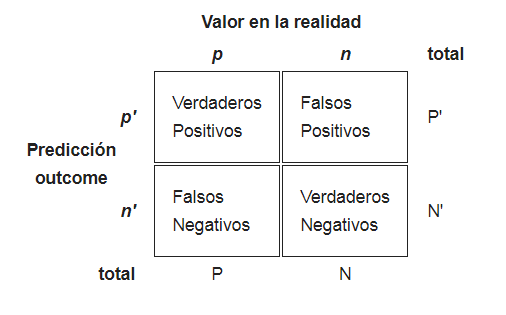

Considérense los siguientes cuatro resultados de 100 instancias positivas y otras 100 negativas:
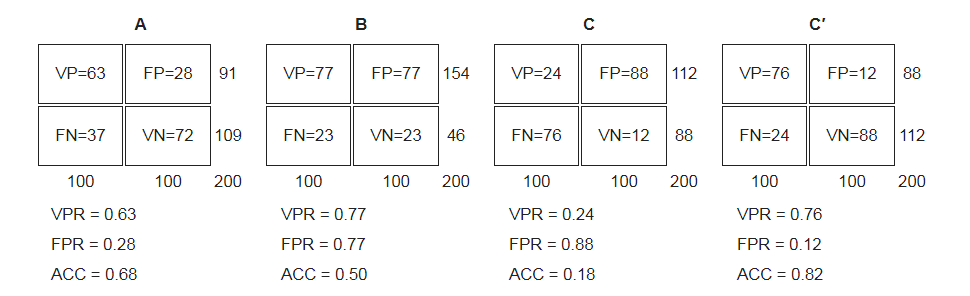

En la imagen inferior se muestran los puntos que los cuatro ejemplos anteriores en el espacio ROC. El resultado del método A muestra claramente ser el mejor de entre los métodos A, B Y C. El resultado de B se encuentra sobre la línea de estimación aleatoria (diagonal); en la tabla se puede ver que la precisión (ACC) de este método es del 50%. El método C aparece como el peor de los tres, con un resultado muy pobre.

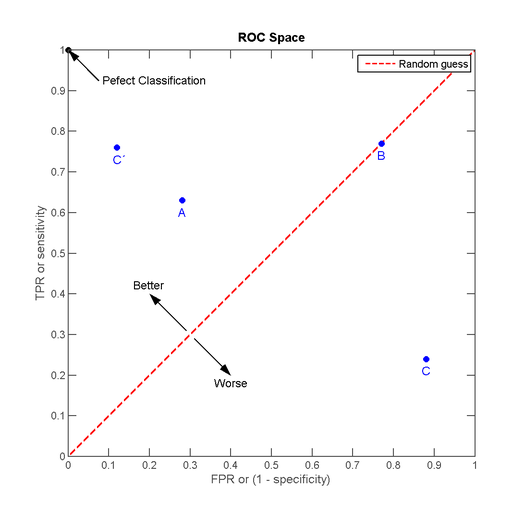
Sin embargo, consideremos ahora la construcción de un cuarto método de predicción C' que simplemente invierte los resultados predichos por el método C. Este nuevo método mostrará una tabla de contingencia opuesta a la de C y su punto en el espacio ROC estará ahora por encima de la diagonal, y más próximo al punto de clasificación perfecta que el método A. Mientras C presentaba un pobre poder de predicción, a partir de él se ha construido un predictor mejor que todos los demás. Cuando el método C predice 'n' o 'p', el método C' predice 'p' o 'n' respectivamente. Siempre que un método presente un punto en el espacio ROC por debajo de la diagonal habrá que invertir sus predicciones para aprovechar su capacidad de predicción.

Cuanto más cerca esté un método de la esquina superior izquierda (clasificación perfecta) mejor será, pero lo que en realidad marca el poder predictivo de un método es la distancia de este a la línea de estimación aleatoria, da igual si por arriba o por abajo.

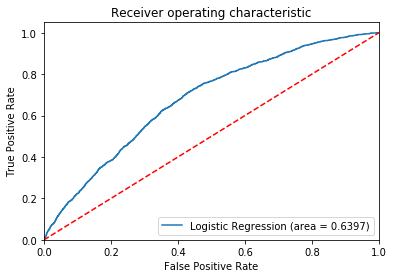

In [43]:
# Curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Método de Naive Bayes

La traducción de "naive" nos indica que la técnica es ingenua, esto es debido a que se asume el supuesto de independencia entre las variables predictoras (los x's). Pero, sabemos que este supuesto, casi siempre, no suele cumplirse en el mundo real.
Sin embargo, se ha demostrado que el método funciona bien en una amplia variedad de contextos.

El método de Naive Bayes son un conjunto de algoritmos supervisados basados en la aplicación del teorema de bayes. Teniendo un vector dependiente $y$ y unas caracteristicas $x_1$ hasta $x_n$, el teorema de Bayes establece la siguiente relación:

$$ P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                    {P(x_1, \dots, x_n)}
$$

Usando el supuesto de independencia, definimos que

$$
   P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),
$$

para todo $i$, esta relación es resumida en

$$
   P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                    {P(x_1, \dots, x_n)}
$$

Sabemos que $P(x_1, \dots, x_n)$ es una constante dado el input, podemos usar la siguiente regla de clasificación:

$$ P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y) $$

$$   \Downarrow$$
$$
   \hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),
$$

and we can use Maximum A Posteriori (MAP) estimation to estimate
$P(y)$ and $P(x_i \mid y)$;
the former is then the relative frequency of class :math:`y`
in the training set.

Los diferentes clasificadores Naive Bayes difieren principalmente por los supuestos que hacen en cuanto a la distribución de $P(x_i \mid y)$.

Por otro lado, aunque Naive Bayes se conoce como un clasificador decente, se sabe que es un mal estimador, por lo que las salidas de probabilidad de **predict_proba** no se suelen toman en consideración.

### Gaussian Naive Bayes

La función "GaussianNB" de sklearn, implementa el algoritmo Gaussiano Naive Bayes para la clasificación. La probabilidad de las características se asume ser Gaussian: 

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \theta_y)^2}{2\sigma^2_y}\right) $$

Los parametros $\sigma_y$ and $\theta_y$ son estimados usando Máxima Verosimilitud (maximum likelihood).

In [399]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.29
Accuracy of GNB classifier on test set: 0.30


In [415]:
gnb.theta_

array([[8.49252209e-01, 3.51858931e+01, 2.75579963e+00, 1.11426967e+04,
        1.08326077e+04, 1.04520726e+04, 1.00121777e+04, 9.73972786e+03,
        9.49525578e+03, 5.24430659e-01, 4.92692046e-01, 4.60740993e-01,
        3.97752379e-01, 3.54223317e-01, 3.39798606e-01, 4.01873725e-01,
        1.14940942e+00, 1.13623810e+00, 9.68665024e-01, 1.00875255e+00,
        9.25900748e-01, 9.33909755e-01, 1.94066536e+00, 1.88028977e+00,
        1.44495666e+00, 1.39184653e+00, 1.24218219e+00, 1.25008498e+00,
        5.78809058e+00, 5.97809738e+00, 4.81955303e+00, 4.49245836e+00,
        3.93397349e+00, 3.90984024e+00, 2.11527022e+00, 2.08121601e+00,
        2.04875510e+00, 2.00575714e+00, 1.94553025e+00, 1.92362763e+00,
        5.57295207e-01, 5.55510707e-01, 5.55786880e-01, 5.52664004e-01,
        5.46248300e-01, 5.41935758e-01, 2.02009687e-01, 1.77664004e-01,
        1.45904147e-01, 1.16842284e-01, 6.41995241e-02, 9.94858939e-02,
        3.62848402e-02, 1.96082597e-02, 1.84398368e-02, 6.144417

In [412]:
gnb.sigma_

array([[8.75316110e+00, 1.30029031e+02, 1.91997455e+01, 9.61179625e+09,
        9.38380049e+09, 9.44773530e+09, 8.65210379e+09, 6.79844022e+09,
        7.25788330e+09, 8.87454135e+00, 8.87508480e+00, 8.87359694e+00,
        8.86468363e+00, 8.85388736e+00, 8.84947372e+00, 8.86550944e+00,
        1.69078159e+01, 1.69669402e+01, 1.55889974e+01, 1.64611000e+01,
        1.57386567e+01, 1.58461059e+01, 3.08126654e+01, 3.14845543e+01,
        2.54751846e+01, 2.60845916e+01, 2.39567392e+01, 2.44575651e+01,
        7.22057212e+01, 7.81153748e+01, 6.29533011e+01, 6.58361197e+01,
        6.47207957e+01, 6.61666780e+01, 1.24587239e+01, 1.24092245e+01,
        1.23638599e+01, 1.22880257e+01, 1.22119486e+01, 1.21481761e+01,
        8.87185547e+00, 8.87205677e+00, 8.87202603e+00, 8.87236471e+00,
        8.87299930e+00, 8.87337960e+00, 8.78633998e+00, 8.77123771e+00,
        8.74975433e+00, 8.72832837e+00, 8.68521615e+00, 8.71472666e+00,
        8.66010646e+00, 8.64436198e+00, 8.64323802e+00, 8.862041

In [401]:
y_pred_nb = gnb.predict(X_test)
y_score_pred_nb = gnb.predict_proba(X_test)

df_resul_nb = pd.DataFrame({'Test':y_test,'Pred':y_pred_nb, 'Prob1':y_score_pred_nb[:,1], 'Prob0':y_score_pred_nb[:,0]})
df_resul_nb.head()

,Test,Pred,Prob1,Prob0
0,0,1,0.997259,0.002741
1,1,1,0.999508,0.000492
2,0,0,0.469628,0.530372
3,0,1,0.998077,0.001923
4,1,1,0.999445,0.000555


In [409]:
df_resul_nb['Prob1'].mean()

0.8238142285381411

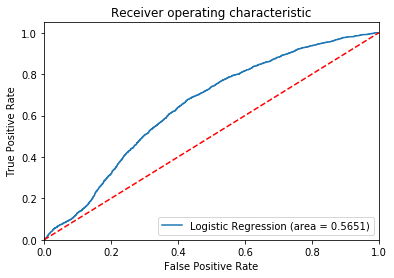

In [402]:
logit_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, y_score_pred_nb[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [403]:
df_resul_nb['Prob1_decil'] = pd.qcut(df_resul_nb['Prob1'], q=10)

# Generamos frecuencias absolutas acumuladas
df_freqAcum_nb = df_resul_nb.groupby('Prob1_decil').agg({'Test':'sum','Pred':'count'}).cumsum() 
df_freqAcum_nb.reset_index(drop = False, inplace = True)

df_freqAcum_nb.rename(columns={'Test':'ATTRITION_acum','Pred':'Q_acum'}, inplace=True)

df_freqAcum_nb['ATTRITION_test'] = df_freqAcum_nb.ATTRITION_acum/df_freqAcum.Q_acum
df_freqAcum_nb['%Q'] = df_freqAcum_nb.Q_acum/max(df_freqAcum.Q_acum)
df_freqAcum_nb['%ATTRITION'] = df_freqAcum_nb.ATTRITION_acum/max(df_freqAcum.ATTRITION_acum)

In [404]:
df_freqAcum_nb

,Prob1_decil,ATTRITION_acum,Q_acum,ATTRITION_test,%Q,%ATTRITION
0,"(-0.0001, 0.002621]",53,1365,0.038828,0.100015,0.027068
1,"(0.002621, 0.8284]",139,2730,0.050916,0.200029,0.070991
2,"(0.8284, 0.9881]",271,4095,0.066178,0.300044,0.138407
3,"(0.9881, 0.9965]",401,5459,0.073457,0.399985,0.204801
4,"(0.9965, 0.9983]",577,6824,0.084555,0.500000,0.294688
5,"(0.9983, 0.9989]",790,8189,0.096471,0.600015,0.403473
6,"(0.9989, 0.9993]",1059,9553,0.110855,0.699956,0.540858
7,"(0.9993, 0.9995]",1388,10918,0.127130,0.799971,0.708887
8,"(0.9995, 0.9996]",1719,12283,0.139950,0.899985,0.877937
9,"(0.9996, 0.9997]",1958,13648,0.143464,1.000000,1.000000


### Referencias:

Regresión Lineal:
- http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
- https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b
- https://datatofish.com/multiple-linear-regression-python/

Regresión Logística:
- https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#activation-sigmoid
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/